## Versão PyTorch

Essa versão foi feita entre os dias 21/05 e 22/05.

### Importando bibliotecas

In [1]:
from torchvision import transforms
from torchvision.transforms import Compose

from utils import *

### Criando pastas e definindo dataset de imagens a serem utilizadas

In [2]:
image_size = (64, 64)

In [3]:
csv_files_path = "csv_files"
csv_filename = "2_details_categories.csv"
src_image_path = "preprocessed"

In [4]:
dir_names = ["dataset_2", "dataset_3", "dataset_6"]

In [5]:
filenames = {
    "2_details_categories.csv": 2,
    "3_details_categories.csv": 3,
    "6_details_categories.csv": 6
}

In [6]:
transform = Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()
])

### Treinando o modelo

Instanciando o modelo utilizado (classe `CNNModel`) com a quantidade de categorias que desejamos utilizar (2, 3 ou 6).

Criação do dataset (`ImageFolder`) e separação em train ($80\%$) e test ($20\%$).

Treinamento do modelo utilizando 10 *epochs*. O modelo é salvo em um arquivo *.pth* que pode ser carregado posteriormente para ser testado.

In [7]:
# Dicionário com relação entre o modelo (CNNModel) e o arquivo no qual deverá ser salvo

models = {
    "model_2": [CNNModel(2), "model_weights_2.pth"],
    "model_3": [CNNModel(3), "model_weights_3.pth"],
    "model_6": [CNNModel(6), "model_weights_6.pth"]
}

In [8]:
# Treinamento do modelo + salvar em arquivos com extensão .pth

for file, num_categories in filenames.items():
    df = dataframe_create(csv_files_path, file, src_image_path)

    dataset_categories_create(df, f"dataset_{num_categories}")

    dataset_create(df, f"dataset_{num_categories}", src_image_path)

    train_loader, test_loader = train_model(num_categories, transform)

    models[f"model_{num_categories}"].append((train_loader, test_loader))

    print(f"Modelo para {num_categories} categorias salvo com sucesso em 'model_weights_{num_categories}.pth'!")

Modelo para 2 categorias salvo com sucesso em 'model_weights_2.pth'!
Modelo para 3 categorias salvo com sucesso em 'model_weights_3.pth'!
Modelo para 6 categorias salvo com sucesso em 'model_weights_6.pth'!


### Testando o modelo

Para cada modelo, utilizando o respectivo `test_loader`, podemos salvar os resultados da precisão em uma lista.

In [9]:
# Dicionário relacionando modelo e categorias

categories_dict = {"model_2": os.listdir("dataset_2"), "model_3": os.listdir("dataset_3"), "model_6": os.listdir("dataset_6")}

In [10]:
metrics = []

for model, info in models.items():
    kwargs = {
        "model": info[0],
        "model_weights_path": info[1],
        "test_loader": info[2][1],
        "class_names": categories_dict[model]
    }

    metrics.append(test_model_full_metrics(**kwargs))

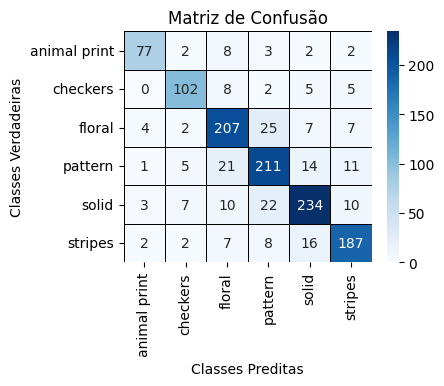

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = metrics[2]['confusion_matrix']
class_names = categories_dict["model_6"]

plt.figure(figsize=(4, 3))

sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=True,
            linewidths=.5,
            linecolor='black'
           )

plt.xlabel('Classes Preditas')
plt.ylabel('Classes Verdadeiras')
plt.title('Matriz de Confusão')
plt.show()

### Balanceamento dos datasets

In [14]:
# Atribuindo a variáveis as quantidades de imagens para cada categoria, em cada dataset

qtde_non_solid_2 = len(os.listdir("dataset_2/non_solid"))
qtde_solid_2 = len(os.listdir("dataset_2/solid"))

qtde_geometric_3 = len(os.listdir("dataset_3/geometric"))
qtde_pattern_3 = len(os.listdir("dataset_3/pattern"))
qtde_solid_3 = len(os.listdir("dataset_3/solid"))

qtde_animal_6 = len(os.listdir("dataset_6/animal print"))
qtde_checkers_6 = len(os.listdir("dataset_6/checkers"))
qtde_floral_6 = len(os.listdir("dataset_6/floral"))
qtde_pattern_6 = len(os.listdir("dataset_6/pattern"))
qtde_solid_6 = len(os.listdir("dataset_6/solid"))
qtde_stripes_6 = len(os.listdir("dataset_6/stripes"))

total_imgs_2 = qtde_non_solid_2 + qtde_solid_2
total_imgs_3 = qtde_geometric_3 + qtde_pattern_3 + qtde_solid_3
total_imgs_6 = qtde_animal_6 + qtde_checkers_6 + qtde_floral_6 + qtde_pattern_6 + qtde_solid_6 + qtde_stripes_6

In [15]:
# Visualização da distribuição das imagens em cada dataset

print("="*60)
print("Dataset 2")

print(f"Quantidade de imagens da categoria 'non_solid': {100 * qtde_non_solid_2/total_imgs_2:.2f}%")
print(f"Quantidade de imagens da categoria 'non_solid': {100 * qtde_solid_2/total_imgs_2:.2f}%")

print("="*60)
print("Dataset 3")

print(f"Quantidade de imagens da categoria 'geometric': {100 * qtde_geometric_3/total_imgs_3:.2f}%")
print(f"Quantidade de imagens da categoria 'pattern': {100 * qtde_pattern_3/total_imgs_3:.2f}%")
print(f"Quantidade de imagens da categoria 'solid': {100 * qtde_solid_3/total_imgs_3:.2f}%")

print("="*60)
print("Dataset 6")

print(f"Quantidade de imagens da categoria 'animal print': {100 * qtde_animal_6/total_imgs_6:.2f}%")
print(f"Quantidade de imagens da categoria 'checkers': {100 * qtde_checkers_6/total_imgs_6:.2f}%")
print(f"Quantidade de imagens da categoria 'floral': {100 * qtde_floral_6/total_imgs_6:.2f}%")
print(f"Quantidade de imagens da categoria 'pattern': {100 * qtde_pattern_6/total_imgs_6:.2f}%")
print(f"Quantidade de imagens da categoria 'solid': {100 * qtde_solid_6/total_imgs_6:.2f}%")
print(f"Quantidade de imagens da categoria 'stripes': {100 * qtde_stripes_6/total_imgs_6:.2f}%")

Dataset 2
Quantidade de imagens da categoria 'non_solid': 48.55%
Quantidade de imagens da categoria 'non_solid': 51.45%
Dataset 3
Quantidade de imagens da categoria 'geometric': 37.22%
Quantidade de imagens da categoria 'pattern': 21.67%
Quantidade de imagens da categoria 'solid': 41.11%
Dataset 6
Quantidade de imagens da categoria 'animal print': 8.43%
Quantidade de imagens da categoria 'checkers': 10.22%
Quantidade de imagens da categoria 'floral': 21.95%
Quantidade de imagens da categoria 'pattern': 21.36%
Quantidade de imagens da categoria 'solid': 21.34%
Quantidade de imagens da categoria 'stripes': 16.71%


### Salvando o modelo para JIT

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
output_dir = "models"
os.makedirs(output_dir, exist_ok=True)
print(f"Verificando/criando diretório: {output_dir}")

Verificando/criando diretório: models


In [21]:
try:
    model = models["model_6"][0].to(device)

    traced_model = torch.jit.trace(
        model,
        torch.randn(1, 3, image_size[0], image_size[1]).to(device)
    ).save(
        os.path.join("models", f"jit_model_detail.pt").lower()
    )

    print(f"Modelo TorchScript salvo em: {os.path.join(output_dir, f'jit_model_detail.pt').lower()}")

except Exception as e:
    print(f"Erro ao rastrear ou salvar o modelo JIT: {e}")

Modelo TorchScript salvo em: models\jit_model_detail.pt


### Funções não mais utilizadas

Estão aqui apenas para registro.

In [ ]:
# # Função equivalente ao create_model()

# class CNNModel(nn.Module):
#     def __init__(self, num_categories):
#         super(CNNModel, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv2d(32, 32, kernel_size=3)
#         self.fc1 = nn.Linear(32 * 14 * 14, 128)  # ajustado para entrada 64x64
#         self.fc2 = nn.Linear(128, num_categories)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))      # Conv1 + ReLU
#         x = self.pool(x)               # MaxPool1
#         x = F.relu(self.conv2(x))      # Conv2 + ReLU
#         x = self.pool(x)               # MaxPool2
#         x = x.view(-1, 32 * 14 * 14)   # Flatten
#         x = F.relu(self.fc1(x))        # Dense1 + ReLU
#         x = self.fc2(x)                # Dense2 (Logits)
#         return x

# # Função equivalente ao fitting()

# transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.ToTensor()
# ])

# def get_dataloaders(train_dir, test_df, test_dir, batch_size=16):
#     train_dataset = datasets.ImageFolder(train_dir, transform=transform)
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     # Dataset personalizado para testar
#     class TestDataset(torch.utils.data.Dataset):
#         def __init__(self, dataframe, img_dir, transform=None):
#             self.dataframe = dataframe
#             self.img_dir = img_dir
#             self.transform = transform

#         def __len__(self):
#             return len(self.dataframe)

#         def __getitem__(self, idx):
#             img_name = self.dataframe.iloc[idx, 0]
#             img_path = os.path.join(self.img_dir, img_name)
#             image = Image.open(img_path).convert("RGB")
#             if self.transform:
#                 image = self.transform(image)
#             return image

#     test_dataset = TestDataset(test_df, test_dir, transform=transform)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     return train_loader, test_loader, train_dataset.class_to_idx
# # Função para treinamento do modelo

# def train_model(model, train_loader, num_epochs=5, learning_rate=0.001, device="cuda" if torch.cuda.is_available() else "cpu"):
#     model.to(device)
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     history = {"loss": [], "accuracy": []}

#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         correct = 0
#         total = 0

#         for inputs, labels in train_loader:
#             inputs, labels = inputs.to(device), labels.to(device)

#             optimizer.zero_grad()
#             outputs = model(inputs)

#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#         epoch_loss = running_loss / len(train_loader)
#         epoch_acc = correct / total

#         print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")
#         history["loss"].append(epoch_loss)
#         history["accuracy"].append(epoch_acc)

#     return model, history
# # Funções para salvar o modelo

# def save_model(model, model_name="model.pth"):
#     torch.save(model.state_dict(), model_name)
#     print(f"-> Model saved as {model_name}")

# def save_history(history, filename="history.json"):
#     with open(filename, "w") as f:
#         json.dump(history, f, indent=4)
# # Funções em comum com a versão utilizando TensorFlow

# def create_train_dict(csv_filename: str):
#     df_file = pd.read_csv(csv_filename)

#     lista = []
#     for i, row in df_file.iterrows():
#         if os.path.isfile(f"./preprocessed/{row['file_name']}"):
#             lista.append(row)

#     df_file = pd.DataFrame(lista)


#     try:
#         df_file.drop("Unnamed: 0", axis=1, inplace=True)
#     except:
#         pass

#     df_file1 = df_file.loc[:, df_file.columns.isin(["file_name", "Details"])]

#     rel_dict = {}

#     df_file_dict = df_file1.to_dict()

#     # for i in range(len(df_file_dict["Details"])):
#         # rel_dict[df_file_dict["file_name"][i]] = df_file_dict["Details"][i]

#     return rel_dict, df_file1

# def create_folder(folder_path):
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)

#         print(f"-> Folder {folder_path} created successfully")
#     else:
#         print(f"-> Folder {folder_path} already exists")

# def create_test_dataset(csv_filename: str, default_csv_filename: str = "manipulated_data/initial_filtered_clothes.csv", images_path: str = "images") -> list:
#     file_list = pd.read_csv(csv_filename)["file_name"].tolist()
#     default_list = pd.read_csv(default_csv_filename)["file_name"].tolist()

#     test_clothes_list = []

#     for img in os.listdir(images_path):
#         if img not in file_list and img in default_list:
#             test_clothes_list.append(img)

#     return test_clothes_list[:len(file_list)//2]

# def create_folder_dataset(test_dataset: list, dest_path: str, src_path: str = "images") -> pd.DataFrame:
#     if not os.path.exists(dest_path):
#         os.makedirs(dest_path)

#         print(f"-> Folder {dest_path} created successfully")
#     else:
#         print(f"-> Folder {dest_path} already exists")

#     for img in test_dataset:
#         src = os.path.join(src_path, img)
#         dest = os.path.join(dest_path, img)

#         if os.path.exists(src):
#             shutil.copy(src, dest)
#         else:
#             print(f"-> File not found: {img}")
    
#     return pd.DataFrame({"file_name": test_dataset})
# # Nome dos arquivos CSV a serem utilizados

# csv_list = []

# csv_path = "csv_files"

# if os.path.exists("csv_files"):
#     for filename in os.listdir("csv_files"):
#         if re.match(r"\d+_details_categories\.csv", filename):
#             csv_list.append(f"{csv_path}/{filename}")
#         else:
#             print(f"Arquivo {filename} possui nome que não segue o padrão exigido (num_details_categories.csv")
# else:
#     print("Caminho para arquivos não existe")
# # Loop principal (single-thread)

# history_list = []

# for csv_file in csv_list:
#     train_dict, df_file1 = create_train_dict(csv_file)
#     categories_list = [cat.lower().replace("-", "_") for cat in df_file1["Details"].value_counts().keys()]
#     num_classes = len(categories_list)

#     dataset_train_path = f"dataset_train_{csv_file[0]}"
#     dataset_test_path = f"dataset_test_{csv_file[0]}"
#     test_dataset = create_test_dataset(csv_file)
#     test_dataframe = create_folder_dataset(test_dataset, dataset_test_path)

#     train_loader, test_loader, class_map = get_dataloaders(
#         dataset_train_path, test_dataframe, dataset_test_path
#     )

#     model = CNNModel(num_categories=num_classes)
#     model, history = train_model(model, train_loader)

#     history_list.append(history)
#     save_model(model, f"model_{csv_file[0]}.pth")
#     save_history(history, f"model_{csv_file[0]}_summary.json")
# # Loop principal (multi-thread)

# history_list = []

# for csv_file in csv_list:
#     _, df_file1 = create_train_dict(csv_file)
#     categories_list = [cat.lower().replace("-", "_") for cat in df_file1["Details"].value_counts().keys()]
#     num_classes = len(categories_list)

#     dataset_train_path = f"dataset_train_{csv_file[10]}"
#     dataset_test_path = f"dataset_test_{csv_file[10]}"
#     test_dataset = create_test_dataset(csv_file)

#     # train_dataset = ImageFolder(root=dataset_train_path, transform=transform)
#     # class_map = train_dataset.class_to_idx

#     # train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
#     # test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

#     # model = CNNModel(num_categories=num_classes)
#     # model, history = train_model(model, train_loader)

#     # history_list.append(history)
#     # save_model(model, f"model_{csv_file[10]}.pth")
#     # save_history(history, f"model_{csv_file[10]}_summary.json")